In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


### Импорты

In [2]:
import pandas as pd
import re
import gensim
from string import punctuation
import nltk
from nltk.corpus import stopwords
import numpy as np

In [3]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
df = pd.read_csv('/content/drive/MyDrive/whole_table_with_lemm.csv', sep='\t')

In [5]:
df['lemms'] = df['notes\n']

In [6]:
df = df.drop('Unnamed: 0', 1)
df = df.drop('notes\n', 1)

### Поиск языка

In [7]:
def which_language (text):
    if bool(re.search('[\u0400-\u04FF]', text)) == True:
        return 'ru'
    else:
        return 'en'

In [8]:
lang=[]
for i,text in enumerate(df['notes'].values): 
    lang.append(which_language(str(text)))

In [9]:
df['lang'] = lang

In [10]:
grouped=df.groupby('lang')

In [11]:
for name, group in grouped: 
    if name == 'en': 
        english = group.drop('lang',axis=1) 
    else: 
        russian = group.drop('lang',axis=1)

In [12]:
df = russian.reset_index(drop=True)

In [13]:
def find_year(date):
  year = int(re.findall(r'\d+', date)[0])
  return year

In [14]:
df['year'] = df['dates'].apply(find_year)

In [15]:
df.head(5)

,notes,dates,id,author,lemms,year
0,Воскресенье. \nВчера приехал Слава навестит...,0/0/0,2950,Василий Сергеевич Савельев,воскресение. \nвчера приезжать слава навеща...,0
1,"Ночью мы достигли банки Антон-Дорн, в Датском ...",0/0/0,2268,Олег Владимирович Амитров,"ночь мы достигать банка антон-дорн, в датский ...",0
2,Суббота. Москва. Еду в Селище.,0/12/21,795,Сергей Иванович Танеев,суббота. москва. ехать в селище.\n,0
3,18 Августа Его Королевское Величество отправил...,1609/8/18,1081,Самуил Бельский,18 август его королевский величество отправлят...,1609
4,"На следующий день, 19 Августа, прибыл в Остров...",1609/8/19,1081,Самуил Бельский,"на следующий день, 19 август, прибывать в остр...",1609


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380967 entries, 0 to 380966
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   notes       380967 non-null  object
 1   dates       380967 non-null  object
 2   id          380967 non-null  int64 
 3   author      380967 non-null  object
 4   lemms       380967 non-null  object
 5   clean_text  380967 non-null  object
 6   len_text    380967 non-null  int64 
 7   year        380967 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 23.3+ MB


Берём только двадцатый век

In [16]:
def find_20th_century(year):
  if year > 1900 and year < 2000:
    return '20'
  else:
    return 'not 20'

In [17]:
df['century'] = df['year'].apply(find_20th_century)

In [18]:
grouped=df.groupby('century')

In [19]:
for name, group in grouped: 
    if name == 'not 20': 
        not_20 = group.drop(['century'],axis=1) 
    else: 
        cent_20 = group.drop(['century'],axis=1)

In [20]:
df_20 = cent_20.reset_index(drop=True)

In [22]:
def find_decade(year):
  if year > 1900 and year < 1911:
    return '1900'
  elif year > 1910 and year < 1921:
    return '1910'
  elif year > 1920 and year < 1931:
    return '1920'
  elif year > 1930 and year < 1941:
    return '1930'
  elif year > 1940 and year < 1951:
    return '1940'
  elif year > 1950 and year < 1961:
    return '1950'
  elif year > 1960 and year < 1971:
    return '1960'
  elif year > 1970 and year < 1981:
    return '1970'
  elif year > 1980 and year < 1991:
    return '1980'
  elif year > 1990 and year < 2000:
    return '1990'

In [54]:
def find_period(year):
  if year > 1900 and year < 1914:
    return 'begining'
  elif year > 1914 and year < 1918:
    return 'WW1_and_revolution'
  elif year > 1918 and year < 1922:
    return 'civil_war'
  elif year > 1922 and year < 1929:
    return 'NEP'
  elif year > 1929 and year < 1941:
    return 'industrialisation'
  elif year > 1941 and year < 1946:
    return 'WW2'
  elif year > 1946 and year < 1954:
    return 'after_WW2'
  elif year > 1954 and year < 1965:
    return 'Khrushchev_Thaw'
  elif year > 1965 and year < 1986:
    return 'stagnation'
  elif year > 1986 and year < 1992:
    return 'perestroika'
  elif year > 1992 and year < 2000:
    return 'new_russia'
  


In [23]:
df_20['decade'] = df_20['year'].apply(find_decade)

In [55]:
df_20['period'] = df_20['year'].apply(find_period)

Предобработка

In [27]:
noise = stopwords.words('russian') + list(punctuation) + list('—')

In [28]:
punkt = punctuation + '—'

In [29]:
def preprocess(text):
  tokens = [word.strip(punkt).lower() for word in text.split() if word.lower() not in noise]
  tokens = [word for word in tokens if word]
  return tokens

In [30]:
df_20['clean_text'] = df_20['lemms'].apply(preprocess)

In [31]:
df_20['len_text'] = ''

In [33]:
df_20['len_text'] = df_20['clean_text'].str.len()

BigARTM

In [ ]:
!apt-get --yes install git make cmake build-essential libboost-all-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
make is already the newest version (4.1-9.1ubuntu1).
make set to manually installed.
libboost-all-dev is already the newest version (1.65.1.0ubuntu1).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
git is already the newest version (1:2.17.1-1ubuntu0.7).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [ ]:
!pip install protobuf tqdm wheel

In [ ]:
!git clone --branch=stable https://github.com/bigartm/bigartm.git

Cloning into 'bigartm'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 16618 (delta 6), reused 6 (delta 0), pack-reused 16591
Receiving objects: 100% (16618/16618), 17.21 MiB | 20.01 MiB/s, done.
Resolving deltas: 100% (11613/11613), done.


In [ ]:
cd bigartm

/content/bigartm


In [ ]:
mkdir build

In [ ]:
cd build

/content/bigartm/build


In [ ]:
!cmake ..

-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Build type: Release
-- Looking for include file unistd.h
-- Looking for include file unistd.h - found
-- Boost version: 1.65.1
-- Looking for pthread.h
-- Looking for pthread.h - found
-- Looking for pthread_create
-- Looking for pthread_create - not found
-- Looking for pthread_create in pthreads
-- Looking for pthread_create in pthreads - not found
-- Looking for pthread_create in pthread
-- Lookin

In [ ]:
!make

Scanning dependencies of target libprotobuf
[  0%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/arena.cc.o
[  0%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/arenastring.cc.o
[  1%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/extension_set.cc.o
[  1%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/generated_message_util.cc.o
[  1%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/io/coded_stream.cc.o
[  2%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/io/zero_copy_stream.cc.o
[  2%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/io/zero_copy_stream_impl_lite.cc.o
[  2%] Building CXX object 3rdparty/protobuf-3.0.0/

In [ ]:
!pip install python/bigartm*.whl -U

Processing ./python/bigartm-0.10.0-cp36-cp36m-linux_x86_64.whl


In [ ]:
cd ../.. 

/content


In [ ]:
!pip install pymorphy2[fast] nltk gensim

     |████████████████████████████████| 61kB 2.8MB/s 
     |████████████████████████████████| 8.2MB 6.4MB/s 
     |████████████████████████████████| 378kB 31.3MB/s 
  Created wheel for DAWG: filename=DAWG-0.8.0-cp36-cp36m-linux_x86_64.whl size=865250 sha256=1d4648a6391fbdd8922b4fd82c6fc11d4d0845bb976b1878099503944a80ae74
  Stored in directory: /root/.cache/pip/wheels/3d/1f/f0/a5b1f9d02e193c997d252c33d215f24dfd7a448bc0166b2a12
Successfully built DAWG


In [ ]:
import artm
%matplotlib inline
import glob
import os, re
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from nltk.corpus import stopwords
import numpy as np
from pymorphy2 import MorphAnalyzer
import gensim, nltk
morph = MorphAnalyzer()
from nltk.tokenize import word_tokenize

/usr/local/lib/python3.6/dist-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)


In [ ]:
def remove_tags(text):
    return re.sub(r'<[^>]+>', '', text)

def clean(words):
    clean = [morph.parse(word)[0].normal_form for word in words if word.isalnum()]
    return clean

In [ ]:
diar_texts = [clean(word_tokenize(remove_tags(text))) for text in df_20['notes']]

In [ ]:
f = open('diar_text.vw', 'w')

for i, text in enumerate(diar_texts):
    c = Counter(text)
    doc = 'doc_'+ str(i) + ' '
    vw_text = ' '.join([x+':'+str(c[x]) for x in c])
    
    f.write(doc + vw_text  + '\n')
f.close()



In [ ]:
def print_measures(model_artm):
    print('Sparsity Phi: {0:.3f} ARTM)'.format(
        model_artm.score_tracker['SparsityPhiScore'].last_value)
)
    print('Sparsity Theta: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['SparsityThetaScore'].last_value))

    print('Kernel contrast: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['TopicKernelScore'].last_average_contrast))

    print('Kernel purity: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['TopicKernelScore'].last_average_purity))

    print('Perplexity: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['PerplexityScore'].last_value)
)
    plt.plot(range(model_artm.num_phi_updates), model_artm.score_tracker['PerplexityScore'].value, 'r--', linewidth=2)
    plt.xlabel('Iterations count')
    plt.ylabel(' ARTM perp. (red)')
    plt.grid(True)
    plt.show()
    

In [ ]:
batch_vectorizer = artm.BatchVectorizer(data_path='diar_text.vw',  
                                        data_format='vowpal_wabbit', 
                                        target_folder='batches', 
                                       batch_size=128) 

In [ ]:
batch_vectorizer = artm.BatchVectorizer(data_path='batches', 
                                        data_format='batches')

In [ ]:
dictionary = artm.Dictionary()

In [ ]:
dictionary.gather(data_path='batches')
dictionary.filter(class_id='@default_class',
                  min_df=10, max_df=2000)

artm.Dictionary(name=b3e4cc79-a214-4c1f-94f4-c56f260576bb, num_entries=76550)

In [ ]:
dictionary.save_text('dict.txt')
# dictionary = artm.Dictionary()
# dictionary.load_text('dict.txt')

In [ ]:
files.download('dict.txt') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model_artm = artm.ARTM(topic_names=['topic_{}'.format(i) for i in range(200)],
                       
                       regularizers=[
                           artm.DecorrelatorPhiRegularizer(
                                            name='Decorr', tau=0.25, 
                                            class_ids=['@default_class'],
                                            topic_names=['topic_{}'.format(i) for i in range(0, 200)]),
                           
                           artm.SmoothSparsePhiRegularizer(
                                            name='SmoothPhi_1', 
                                            class_ids=['@default_class'],
                                            tau=0.15, 
                                            topic_names=['topic_{}'.format(i) for i in range(0, 200)])
                                    ]
                        )


In [ ]:
model_artm.initialize(dictionary=dictionary, )

In [ ]:
# добавляем метрики
model_artm.scores.add(artm.PerplexityScore(name='PerplexityScore',
                                                    dictionary=dictionary))
model_artm.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore')) 
model_artm.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore')) 
model_artm.scores.add(artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.1)) 
model_artm.scores.add(artm.TopTokensScore(class_id='@default_class', name='TopTokensScore_1', num_tokens=10)) 

In [ ]:
model_artm.num_document_passes = 2
model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=3)

Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.001 (ARTM)
Kernel purity: 0.000 (ARTM)
Perplexity: 10.149 (ARTM)


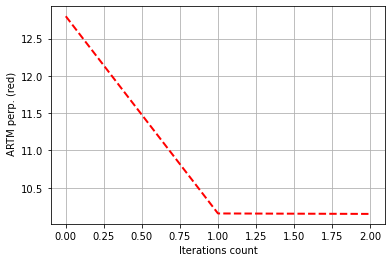

In [ ]:
print_measures(model_artm)

In [ ]:
model_artm.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-0.15, 
                                                            topic_names=['topic_{}'.format(i) for i in range(1, 200)],
                                                            ))
model_artm.regularizers.add(artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.15, 
                                                              topic_names=['topic_{}'.format(i) for i in range(1, 200)]))

In [ ]:
model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)

In [ ]:
phi_tau = model_artm.regularizers['SparsePhi'].tau
theta_tau = model_artm.regularizers['SparseTheta'].tau

for i in range(10):
    model_artm.regularizers['SparsePhi'].tau = (phi_tau + (phi_tau*0.5))
    model_artm.regularizers['SparseTheta'].tau = (theta_tau + (theta_tau*0.1))
    
    model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)
    

Sparsity Phi: 0.928 ARTM)
Sparsity Theta: 0.885 (ARTM)
Kernel contrast: 0.604 (ARTM)
Kernel purity: 0.690 (ARTM)
Perplexity: 6.772 (ARTM)


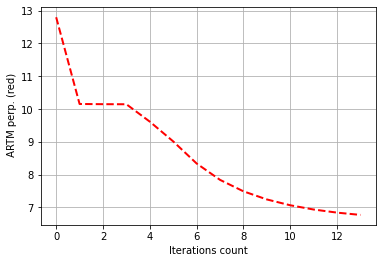

In [ ]:
print_measures(model_artm)

In [ ]:
for topic_name in model_artm.topic_names[:50]:
    print(topic_name + ': ')
    try:
        for x in model_artm.score_tracker['TopTokensScore_1'].last_tokens[topic_name]:
            print(x)
        print('---------')
    
    except KeyError: 
        continue

topic_0: 
дата
завтрашний
годовщина
исполниться
душный
послезавтра
переписывать
вериться
выезжать
радовать
---------
topic_1: 
la
n
y
etc
en
чорт
pas
муля
асеев
grand
---------
topic_2: 
шапка
валенок
организм
обувь
выжить
повсюду
жир
жуткий
индия
умерший
---------
topic_3: 
капуста
текущий
рожь
бр
огурец
семя
игад
зерно
урожай
лен
---------
topic_4: 
зритель
трагический
кризис
трагедия
юмор
монолог
острота
высоцкий
отелло
психологический
---------
topic_5: 
религия
религиозный
христианство
хаос
веровать
материя
христианский
пустыня
цивилизация
плоть
---------
topic_6: 
ирина
поработать
неважно
отд
лидочка
оч
описон
вече
го
ень
---------
topic_7: 
столб
солнышко
бревно
цвета
дыра
залить
сирень
потолок
крыса
полоска
---------
topic_8: 
ас
ак
котик
инут
григорьев
леночка
анович
тат
ф
архангельский
---------
topic_9: 
таять
ветка
утка
луг
гусь
птичка
стая
бекас
зачеркнуть
стойка
---------
topic_10: 
коллектив
сельский
промышленность
срочно
рассмотреть
мероприятие
выделить
обеспечение
пред

Берём 5 "высоких" и по 5 "бытовых" тем, фильтруем на наличие персоналий и шума, затем создаём два списка

In [40]:
high_cult_words = ['зритель','трагический','кризис','трагедия','юмор','монолог','острота','психологический','религия','религиозный','христианство','хаос','веровать','материя','христианский','пустыня','цивилизация','плоть','философия','бытие','философ','отвращение','непонимание','индивидуальность','мыслить','жизненный','сюжет','педагог','гармония','пошлость','пошлый', 'простота', 'блестяще','ритм','сочетание','выпускной','нота','композитор','ансамбль','партитура','дирижёр','фортепиано']
mass_cult_words = ['шапка', 'валенок', 'организм', 'обувь','выжить', 'жир', 'умерший', 'капуста', 'рожь', 'огурец', 'семя', 'зерно', 'урожай', 'лен', 'коллектив','сельский','промышленность','рассмотреть', 'мероприятие','выделить','обеспечение','предприятие', 'правление','уборка','ферма','зав','колхозник','копать','трудодень','бригадир','постановить','навоз','гриб','пиво','варить','вкусный','набрать','пирог','тарелка','литр','ложка','стирать']

In [43]:
def high(text):
  h = 0
  for word in text:
    if word in high_cult_words:
      h+=1
    else:
      continue
  return h

def mass(text):
  l = 0
  for word in text:
    if word in mass_cult_words:
      l+=1
    else:
      continue
  return l

In [44]:
df_20['high_cult'] = df_20['clean_text'].apply(high)
df_20['mass_cult'] =df_20['clean_text'].apply(mass)

In [61]:
df_20.head(10)

,notes,dates,id,author,lemms,year,decade,clean_text,len_text,high_cult,mass_cult,period
0,Вчера закончилось дело о беспорядках в Малом т...,1901/1/1,12,Александра Викторовна Богданович,вчера заканчиваться дело о беспорядок в малый ...,1901,1900,"[вчера, заканчиваться, дело, беспорядок, малый...",21,0,0,begining
1,"...Но нельзя так писать, как я начала страницу...",1901/1/1,128,Зинаида Николаевна Гиппиус,"...но нельзя так писать, как я начинать страни...",1901,1900,"[но, писать, начинать, страница, ложь, вовсе, ...",271,1,0,begining
2,Вторник. Японский Новый Год \nВчера за всен...,1901/1/1,577,Николай Японский,вторник. японский новый год \nвчера за всен...,1901,1900,"[вторник, японский, новый, год, вчера, всенощн...",94,0,0,begining
3,*Вторник.* Пароход со стрелками ушел в 7 ч. ут...,1901/1/1,183,Николай II Александрович Романов,*вторник.* пароход со стрелка уходить в 7 ч. у...,1901,1900,"[вторник, пароход, стрелка, уходить, 7, ч, утр...",33,0,0,begining
4,*19.* Был у Плеске разрешил на сей раз отсрочи...,1901/1/1,963,Яков Соломонович Поляков,*19.* быть у плеск разрешать на сей раз отсроч...,1901,1900,"[19, плеск, разрешать, сей, отсрочивать, сумма...",33,0,0,begining
5,"1) «Новости дня»» 18 декабря 1900 г.<com id=""1...",1901/1/1,1386,Владимир Аркадьевич Теляковский,"1) «новость день»» 18 декабрь 1900 г.<com id=""...",1901,1900,"[1, «новость, день»», 18, декабрь, 1900, г.<co...",354,0,0,begining
6,Катастрофа в Белом городе — котельные стропила...,1901/1/1,1980,Роберт Эдуардович Классон,катастрофа в белый город — котельный стропило ...,1901,1900,"[катастрофа, белый, город, котельный, стропило...",34,0,0,begining
7,*19* *Дек.* *1900.* *Москва.* Всѣ эти четыре д...,1901/1/1,196,Лев Николаевич Толстой,*19* *дека.* *1900.* *москва.* все этот четыре...,1901,1900,"[19, дека, 1900, москва, четыре, день, б[ылъ, ...",240,3,0,begining
8,Вторник. Москва. Б[ыл] в банке. Взял 120 руб. ...,1901/1/1,795,Сергей Иванович Танеев,вторник. москва. б[ыл] в банк. взять 120 руб. ...,1901,1900,"[вторник, москва, б[ыл, банк, взять, 120, руб,...",66,0,0,begining
9,"Вчера так голова болела, что пролежала целый д...",1901/1/2,143,Елизавета Александровна Дьяконова,"вчера так голова болеть, что пролеживать целый...",1901,1900,"[вчера, голова, болеть, пролеживать, целый, де...",669,0,0,begining


In [ ]:
decs = df_20.groupby('period')

In [63]:
period = df_20.groupby('period')

In [48]:
decs.sum() # топорно, но своё дело делает

,id,year,len_text,high_cult,mass_cult
decade,,,,,
1900,17703288,53257706,3563462,5604,2385
1910,22147140,75490211,5270173,7134,4596
1920,20544443,65877019,3464373,5881,4787
1930,22989072,63252253,3846602,5402,5483
1940,57780131,136217925,7874658,9206,15850
1950,19318086,44491638,1889299,3180,6757
1960,13740694,50238970,2726638,3713,5086
1970,16063837,43840610,2318732,5342,3659
1980,17906927,49679929,2874292,5668,5935


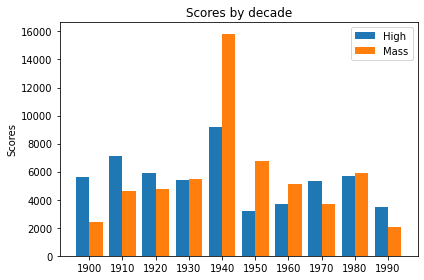

In [53]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['1900', '1910', '1920', '1930', '1940', '1950', '1960', '1970', '1980', '1990']
high_cult = [5604, 7134, 5881, 5402, 9206, 3180, 3713, 5342, 5668, 3511]
mass_cult = [2385, 4596, 4787, 5483, 15850, 6757, 5086, 3659, 5935, 2048]

x = np.arange(len(labels))  
width = 0.4  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, high_cult, width, label='High')
rects2 = ax.bar(x + width/2, mass_cult, width, label='Mass')


ax.set_ylabel('Scores')
ax.set_title('Scores by decade')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

In [64]:
period.sum()

,id,year,len_text,high_cult,mass_cult
period,,,,,
Khrushchev_Thaw,18777552,46759580,2222164,3195,7318
NEP,12631225,38558786,2076301,3270,2433
WW1_and_revolution,7189985,23700603,1669535,2270,1375
WW2,36602044,91880972,5154446,5521,10867
after_WW2,10504363,27695324,1376754,2634,2378
begining,21111303,65714630,4332718,7126,2789
civil_war,7559728,29509089,1842396,2123,2315
industrialisation,25116729,68793283,4169846,5943,6119
new_russia,8700788,19502440,1071605,2755,1389


<function matplotlib.pyplot.show>

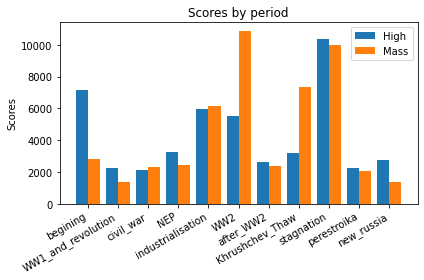

In [66]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['begining', 'WW1_and_revolution', 'civil_war', 'NEP', 'industrialisation', 'WW2', 'after_WW2', 'Khrushchev_Thaw', 'stagnation', 'perestroika', 'new_russia']
high_cult = [7126, 2270, 2123, 3270, 5943, 5521, 2634, 3195, 10386, 2222, 2755]
mass_cult = [2789, 1375, 2315, 2433, 6119, 10867, 2378, 7318, 9973, 2057, 1389]

x = np.arange(len(labels))  
width = 0.4  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, high_cult, width, label='High')
rects2 = ax.bar(x + width/2, mass_cult, width, label='Mass')


ax.set_ylabel('Scores')
ax.set_title('Scores by period')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
fig.tight_layout()



plt.show